In [1]:
import sys
sys.path.insert(0, "/home/bill/pymc3/")

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import theano
import theano.tensor as tt
import pymc3 as pm

In [9]:
tt.concatenate((np.random.randn(3,1), np.random.randn(3,1)*10), 1).eval().shape

(3, 2)

 /home/bill/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning:covariance is not positive-semidefinite.


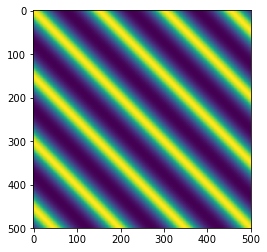

In [74]:
X = np.linspace(0,2*np.pi,500)

def warp_func(x, T):
    c = 2.0 * np.pi * (1./T)
    u = tt.concatenate((tt.sin(c*x), tt.cos(c*x)), 1)
    return u

with pm.Model() as model:
    T = 1.9
    l = 1.0
    cov_exp = pm.gp.cov.ExpQuad(2, l)
    cov = pm.gp.cov.WarpedInput(1, cov_func=cov_exp, 
                                warp_func=warp_func,
                                args=(T,))
    
K = theano.function([], cov(X[:,None]))()
plt.imshow(K);
samples = np.random.multivariate_normal(np.zeros(K.shape[0]), K, 1).flatten()

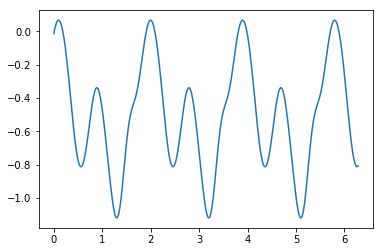

In [75]:
plt.plot(X.flatten(), samples);

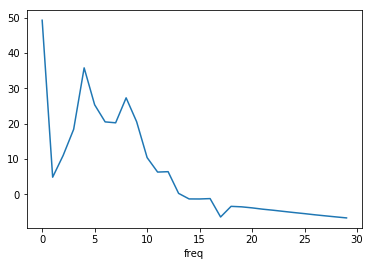

In [67]:
def plot_spectrum(x, fs):
    p = 20 * np.log10(np.abs(np.fft.rfft(x)))
    f = np.linspace(0, fs/2, len(p))
    plt.plot(f[:30], p[:30]);
    plt.xlabel("freq")
    
plot_spectrum(samples, 500)

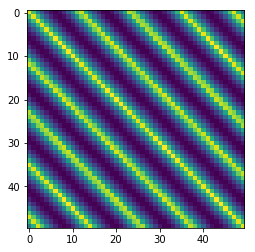

In [48]:
import GPy
plt.imshow(GPy.kern.PeriodicExponential(1, lengthscale=l, period=T).K(X[:,None]))